In [52]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import csv
import torch
import random

In [14]:
car_to_label = {}
obj = []
col = torch.load("column.pkl")
minmax_dict = {'max':np.zeros(len(col)),'min':np.zeros(len(col))}
for brandNum in range(1,4):

    temp = {}
    if brandNum in [1,2]:
        train_obj = glob(f"./Rawdata/Brand{brandNum}/Train_data/train_pkl_1000/*.pkl")
        test_obj = glob(f"./Rawdata/Brand{brandNum}/Test_data/test_pkl_1000/*.pkl")
        with open(f"./Rawdata/Brand{brandNum}/train_label.csv","r") as fread:
            reader = csv.DictReader(fread)
            for row in reader:
                temp[int(row["car"])] = int(row["label"])

        with open(f"./Rawdata/Brand{brandNum}/test_label.csv","r") as fread:
            reader = csv.DictReader(fread)
            for row in reader:
                temp[int(row["car"])] = int(row["label"])
        obj += (train_obj+test_obj)
    else : 
        data_obj = glob(f"./Rawdata/Brand{brandNum}/brand{brandNum}_pkl_1000/*.pkl")
        with open(f"./Rawdata/Brand{brandNum}/all_label.csv","r") as fread:
            reader = csv.DictReader(fread)
            for row in reader:
                temp[int(row["car"])] = int(row["label"])
        obj += data_obj
    car_to_label.update(temp)

    temp_dict = np.load(f"./Rawdata/Brand{brandNum}/minmax_stats_brand{brandNum}.npy",allow_pickle=True).item()
    
    for i in range(len(col)):
        minmax_dict['max'][i] = float(max(minmax_dict['max'][i],temp_dict['max'][i]))
        minmax_dict['min'][i] = float(min(minmax_dict['min'][i],temp_dict['min'][i]))

        

print(len(car_to_label.keys()))
print(len(obj))
print(minmax_dict)

348
5000
{'max': array([4.52200000e+01, 2.53867188e+01, 1.00000000e+02, 4.30078125e+00,
       4.28867188e+00, 5.00000000e+01, 4.60000000e+01, 4.73510000e+04]), 'min': array([  -9.53935618, -200.2       ,    0.        ,    0.        ,
          0.        ,  -11.        ,  -39.        ,    0.        ])}


dict_keys([61, 86, 80, 95, 52, 149, 11, 103, 73, 83, 127, 62, 75, 152, 128, 20, 146, 138, 40, 99, 41, 27, 53, 161, 125, 30, 16, 100, 85, 19, 31, 50, 88, 90, 17, 43, 164, 115, 159, 51, 65, 69, 3, 139, 91, 59, 151, 134, 120, 96, 154, 14, 55, 58, 45, 82, 48, 71, 111, 28, 79, 123, 162, 84, 66, 72, 42, 64, 141, 122, 102, 106, 7, 143, 113, 9, 57, 6, 1, 15, 131, 32, 104, 121, 112, 47, 38, 8, 135, 163, 98, 110, 26, 74, 156, 22, 133, 44, 155, 142, 92, 108, 160, 81, 56, 140, 117, 116, 109, 132, 144, 39, 93, 101, 54, 60, 10, 5, 105, 68, 23, 67, 12, 158, 35, 153, 126, 29, 87, 37, 157, 165, 34, 36, 145, 70, 25, 24, 119, 148, 188, 179, 173, 195, 180, 187, 167, 192, 193, 197, 170, 189, 198, 172, 178, 175, 177, 183, 168, 181, 191, 190, 186, 185, 169, 176, 194, 182, 174, 171, 210, 205, 206, 207, 204, 213, 218, 211, 214, 208, 219, 221, 209, 224, 212, 225, 217, 216, 223, 215, 222, 202, 203, 220, 201, 227, 239, 241, 237, 248, 234, 246, 244, 245, 240, 233, 236, 243, 242, 249, 238, 247, 235, 453, 440, 447, 

/tmp/ipykernel_10853/3423360945.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_n[0].legend()
/tmp/ipykernel_10853/3423360945.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_a[0].legend()


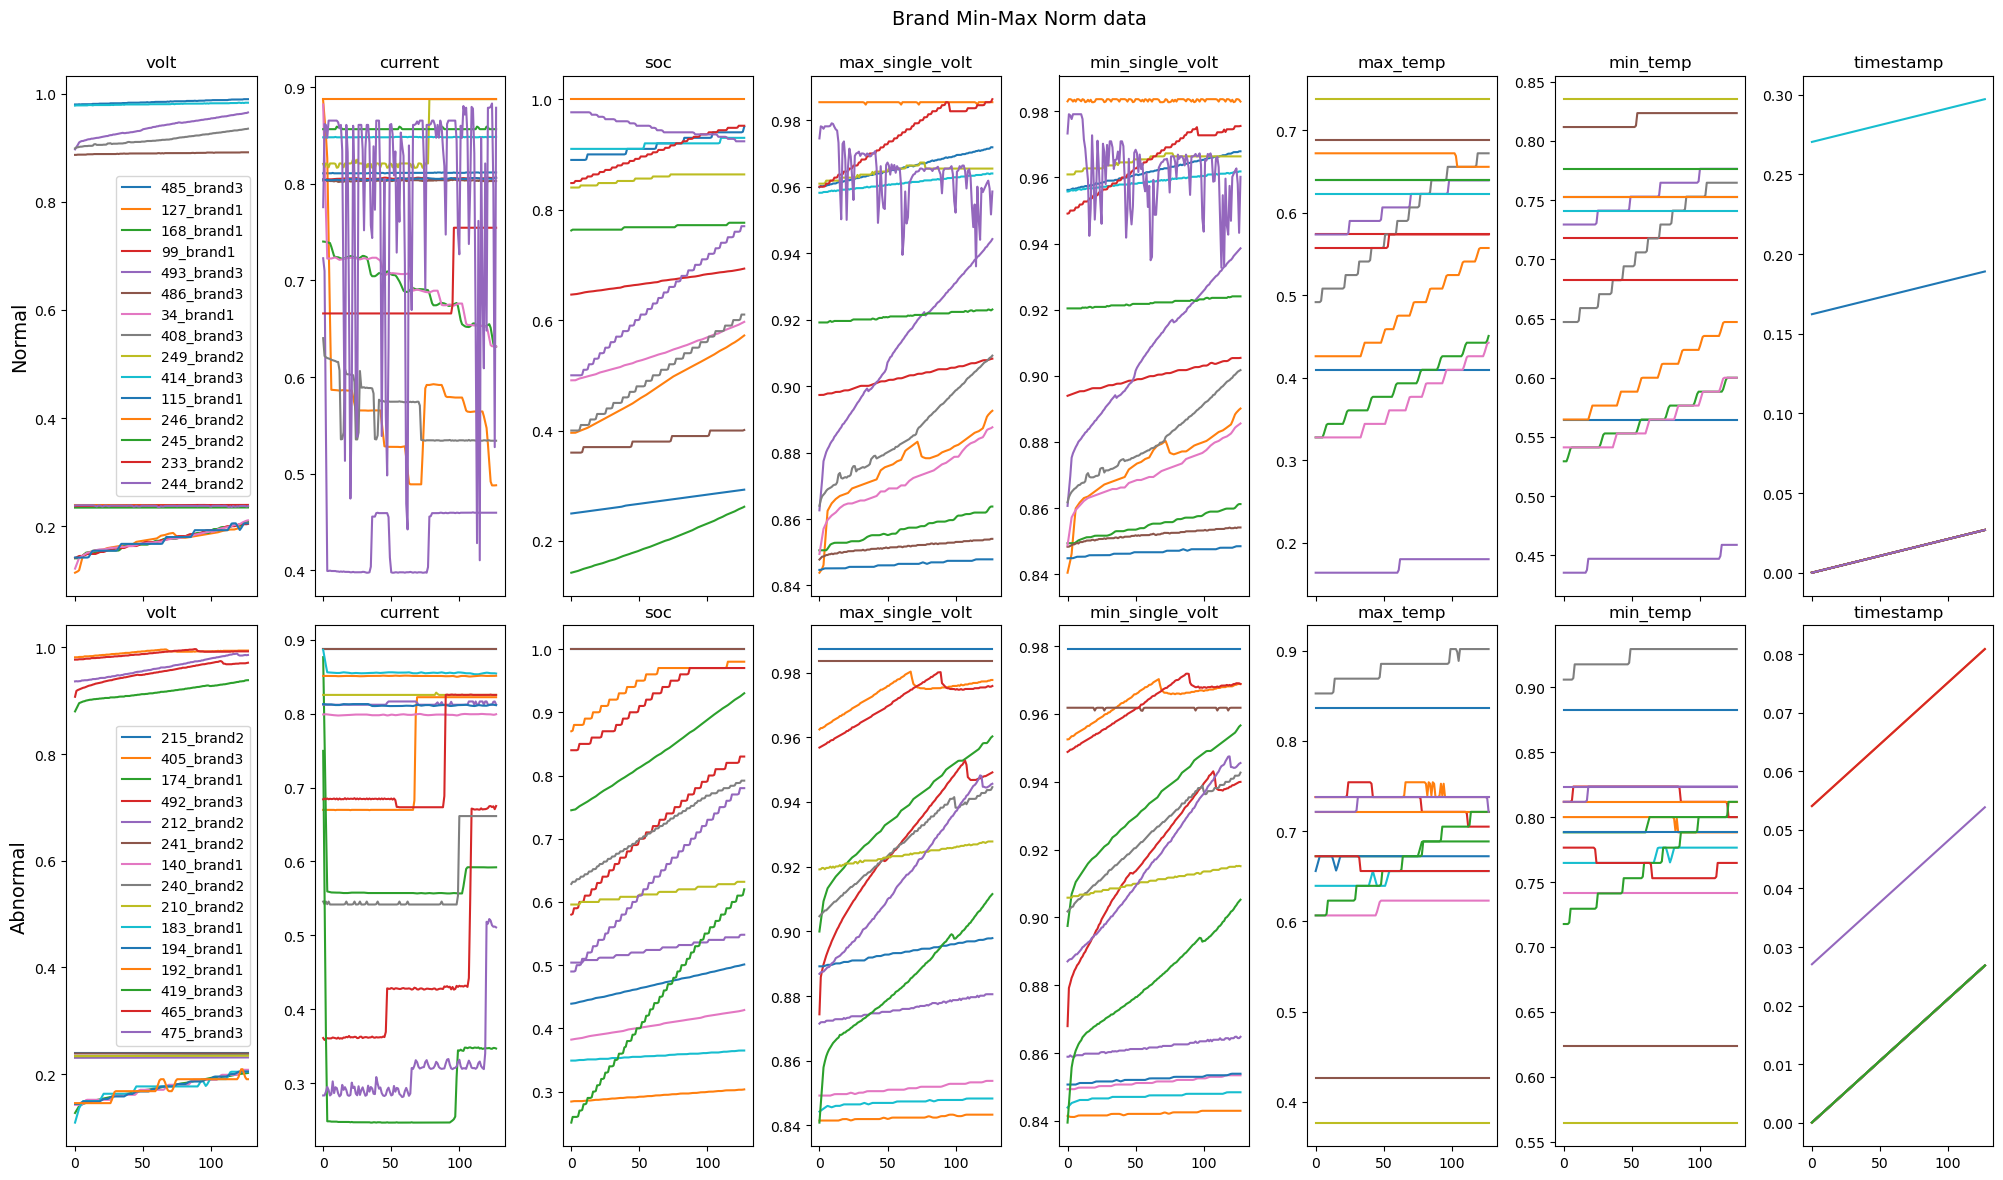

In [58]:
car_norm_data = {}
for i in obj:
    raw_data = torch.load(i,weights_only=False)

    norm_data = (raw_data[0]-minmax_dict['min']) / (minmax_dict['max'] - minmax_dict['min'])

    car_norm_data.setdefault(int(raw_data[1]['car']),[]).append(norm_data)

print(car_norm_data.keys())

fig,axes = plt.subplots(nrows=2, ncols=len(col),sharex=True, figsize=(20,12))
fig.suptitle("Brand Min-Max Norm data",fontsize=14)
fig.tight_layout(rect=(0,0,1,0.97))
ax_n = axes[0, :]
ax_a = axes[1, :]
brand_cnt_n = {1:0,2:0,3:0}
brand_cnt_a = {1:0,2:0,3:0}
howmany = 5


seed = 42
items = list(car_norm_data.items())
random.Random(seed).shuffle(items)

for cid , value in items:
    if car_to_label[cid]==0:
        ax_n[0].legend()
        ax_n[0].set_ylabel("Normal",fontsize=14)
        if cid<200 and brand_cnt_n[1] <howmany :
            for i in range(len(col)):
                ax_n[i].set_title(col[i])
                ax_n[i].plot(value[0][:,i],label=f"{cid}_brand1")
            brand_cnt_n[1] += 1
        elif 200< cid <= 250 and brand_cnt_n[2]<howmany :
            for i in range(len(col)):
                ax_n[i].plot(value[0][:,i],label=f"{cid}_brand2")
            brand_cnt_n[2] += 1
        elif 400 <= cid <=500 and brand_cnt_n[3]<howmany :
            for i in range(len(col)):
                ax_n[i].plot(value[0][:,i],label=f"{cid}_brand3")
            brand_cnt_n[3] += 1

    if car_to_label[cid]==1:
        ax_a[0].legend()
        ax_a[0].set_ylabel("Abnormal",fontsize=14)
        if cid<200 and brand_cnt_a[1] <howmany :
            for i in range(len(col)):
                ax_a[i].set_title(col[i])
                ax_a[i].plot(value[0][:,i],label=f"{cid}_brand1")
            brand_cnt_a[1] += 1
        elif 200< cid <= 250 and brand_cnt_a[2] <howmany :
            for i in range(len(col)):
                ax_a[i].plot(value[0][:,i],label=f"{cid}_brand2")
            brand_cnt_a[2] += 1
        elif 400 <= cid <=500 and brand_cnt_a[3] <howmany :
            for i in range(len(col)):
                ax_a[i].plot(value[0][:,i],label=f"{cid}_brand3")
            brand_cnt_a[3] += 1